In [1]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('data/qatar2022.csv')
df.columns = df.columns.str.lower()
df.head(6)

,sl. no,match no.,team,against,group,goal,possession (%),inside penalty area,outside penalty area,assists,...,fouls against,offsides,passes,passes completed,crosses,crosses completed,corners,free kicks,penalties scored,pts
0,1,1,Qatar,Ecuador,A,0,40,0,0,0,...,15,3,453,387,10,5,1,19,0,0
1,2,1,Ecuador,Qatar,A,2,46,2,0,1,...,15,4,484,419,26,10,3,17,1,3
2,3,2,England,Iran,B,6,69,6,0,6,...,9,2,810,733,29,9,8,16,0,3
3,4,2,Iran,England,B,2,20,2,0,1,...,14,2,232,156,11,3,0,10,1,0
4,5,3,Senegal,Netherlands,A,0,39,0,0,0,...,13,2,391,326,22,8,6,14,0,0
5,6,3,Netherlands,Senegal,A,2,41,2,0,1,...,13,1,457,386,26,7,7,15,0,3


In [71]:
# create result column; win: 2, draw: 1, loss:0

result = []
for item in df['match no.'].unique():
    temp = df[df['match no.'] == item].goal.tolist()
    if temp[0]>temp[1]:
        result.append(2)
        result.append(0)
    elif temp[0]==temp[1]:
        result.append(1)
        result.append(1)
    else:
        result.append(0)
        result.append(2)
        
df['outcome'] = result

In [81]:
# create new team stats dataframe

teams = df.team.unique()
team_df  = pd.DataFrame()
team_df['team'] = teams

stat_cols = ['goal','possession (%)','inside penalty area','outside penalty area','assists','total attempts',
             'on target','off target','target in penalty','target from outside','left channel', 'left inside channel',
             'central channel','right inside channel','right channel','receptions md','receptions d','attempted line breaks',
             'completed line breaks','attempted defensive line breaks','completed defensive line breaks','yellow cards',
             'red cards','fouls against','offsides','passes','passes completed','crosses','crosses completed','corners',
             'free kicks','penalties scored','pts','outcome']

for col in stat_cols:
    team_df[col] = 0

team_list1 = []
idx = 0
for team in teams:
    team_list2 = []
    for col in stat_cols:
        team_list2.append( np.median(df[df.team == team][col]) )
    team_list1.append(team_list2)
        
team_df[stat_cols] = team_list1
team_df.head(5)

,team,goal,possession (%),inside penalty area,outside penalty area,assists,total attempts,on target,off target,target in penalty,...,offsides,passes,passes completed,crosses,crosses completed,corners,free kicks,penalties scored,pts,outcome
0,Qatar,0.5,41.0,0.5,0.0,0.5,7.5,1.0,6.0,3.0,...,3.5,438.5,370.0,14.0,5.0,3.5,17.0,0.0,0.0,0.0
1,Ecuador,1.5,41.0,1.5,0.0,0.5,9.5,4.5,3.5,6.5,...,4.0,456.5,386.0,26.0,9.0,4.0,16.5,0.5,2.0,1.5
2,England,3.0,60.0,3.0,0.0,3.0,10.5,5.0,3.5,8.0,...,1.5,680.0,610.5,21.0,6.5,5.5,15.5,0.0,2.0,1.5
3,Iran,2.0,26.5,1.5,0.5,1.0,14.5,4.5,5.0,6.5,...,2.0,263.5,179.0,18.5,3.5,3.5,10.5,0.5,1.5,1.0
4,Senegal,1.5,43.5,1.5,0.0,1.0,13.5,4.0,6.5,9.0,...,2.5,451.0,385.5,21.0,7.0,6.5,12.5,0.0,1.5,1.0


In [112]:
# quick and dirty linear regression

stat_cols1 = ['possession (%)','inside penalty area','outside penalty area','assists','total attempts',
             'on target','off target','target in penalty','target from outside','left channel', 'left inside channel',
             'central channel','right inside channel','right channel','receptions md','receptions d','attempted line breaks',
             'completed line breaks','attempted defensive line breaks','completed defensive line breaks','yellow cards',
             'red cards','fouls against','offsides','passes','passes completed','crosses','crosses completed','corners',
             'free kicks','penalties scored']


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_reg = LinearRegression()

X = team_df[stat_cols1]
y = team_df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg.fit(X_train ,y_train)

29    0.0
15    1.0
24    2.0
17    1.5
8     1.0
9     1.0
30    2.0
Name: outcome, dtype: float64

In [143]:
# MAE

print('MAE: \n')

round(np.mean(abs(y_test-y_pred)),4)

MAE: 



0.5481

In [144]:
lr_df = pd.DataFrame()
lr_df['stat'] = stat_cols1
lr_df['importance'] = lin_reg.coef_
lr_df.sort_values('importance')

,stat,importance
6,off target,-0.283408
20,yellow cards,-0.241819
23,offsides,-0.230339
3,assists,-0.211885
1,inside penalty area,-0.211074
10,left inside channel,-0.201672
18,attempted defensive line breaks,-0.093051
11,central channel,-0.088107
24,passes,-0.053473
17,completed line breaks,-0.051832


<AxesSubplot:title={'center':'Statistical Importance \n'}, ylabel='stat'>

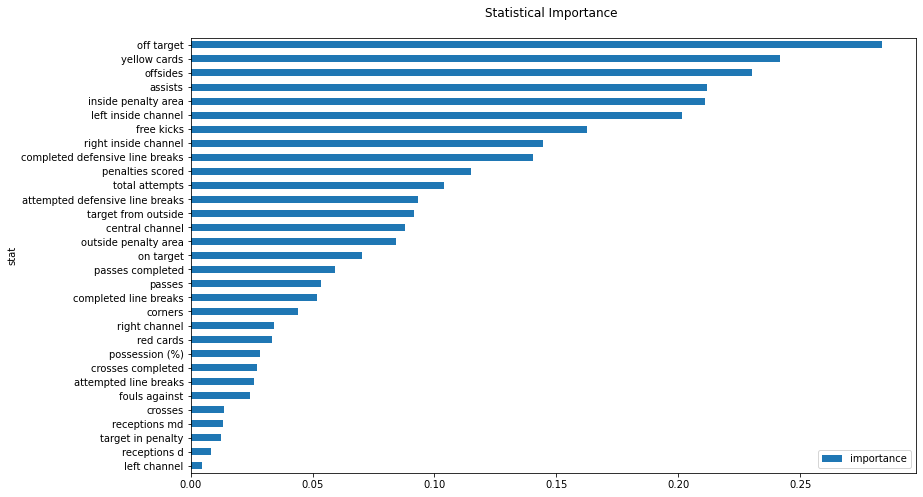

In [140]:
imp_df = lr_df.copy()
imp_df.importance = abs(imp_df.importance)
imp_df.sort_values('importance', ascending=True, inplace=True, )
imp_df.index = imp_df.stat
imp_df.plot.barh(figsize=(13,8), title='Statistical Importance \n')